<a href="https://colab.research.google.com/github/nyulnyul/FootballValues/blob/main/footballvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
#최초 1회 실행
!sudo apt-get install fonts-nanum


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [12]:
!rm ~/.cache/matplotlib -rf

In [13]:
#pip install pandas openpyxl
#최초 1회 실행


#데이터 전처리 과정

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

# 폰트 설치 경로 확인
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# 폰트 설정
mpl.rcParams['font.family'] = 'NanumBarunGothic'

# 음수 부호 정상 출력을 위한 설정
mpl.rcParams['axes.unicode_minus'] = False


In [2]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

from google.colab import drive

In [3]:
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/realfootball.xlsx'

# !git clone https://github.com/nyulnyul/FootballValues.git '/content/drive/My Drive/FootballValues'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##파일 존재 여부 파악

파일이 존재합니다.
파일이 성공적으로 불러와졌습니다.
                name  age  height        nationality place_of_birth  price  \
0    Aaron Cresswell   33    1.70            England      Liverpool    2.5   
1       Aaron Hickey   20    1.85           Scotland        Glasgow   18.0   
2     Aaron Ramsdale   25    1.90            England     Chesterton   38.0   
3       Aaron Ramsey   32    1.78              Wales     Caerphilly    3.0   
4  Aaron Wan-Bissaka   25    1.83  England  DR Congo         London   22.0   

   max_price                     position  shirt_nr   foot  ...  \
0       12.0         Defender - Left-Back         3   left  ...   
1       18.0         Defender - Left-Back         2   both  ...   
2       38.0                   Goalkeeper         1  right  ...   
3       45.0  midfield - Central Midfield        16  right  ...   
4       40.0        Defender - Right-Back        29  right  ...   

  Per 90 Minutes.4_G+A-PK Per 90 Minutes.5_xG Per 90 Minutes.6_xAG  \
0                    0.10   

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


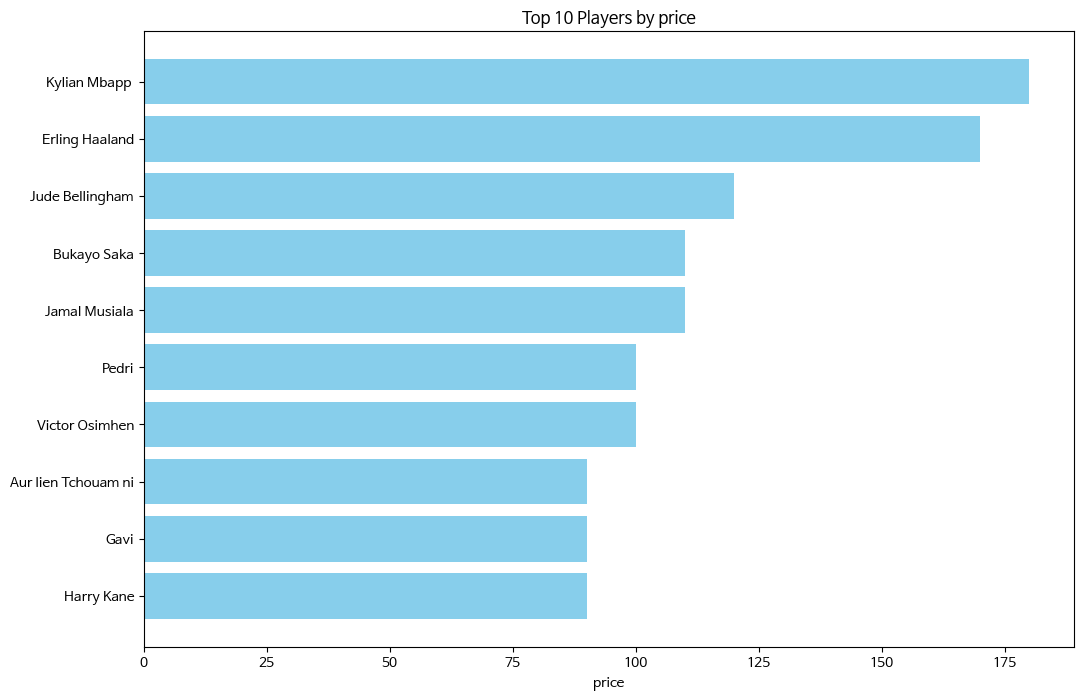

In [4]:
if os.path.exists(file_path):
    print("파일이 존재합니다.")
    try:
        # Excel 파일 불러오기
        df = pd.read_excel(file_path)
        print("파일이 성공적으로 불러와졌습니다.")

        # 데이터의 첫 몇 줄을 확인하여 구조 파악
        print(df.head())

        # 결측값 처리
        print("결측값 처리 전 각 열의 결측값 수:")
        print(df.isnull().sum())
        df.fillna(0, inplace=True)

        # 가장 높은 시장 가치를 가진 선수 찾기
        max_value_player = df.loc[df['price'].idxmax()]  # price 열을 사용하여 가장 높은 시장 가치를 가진 선수를 찾음
        print("가장 높은 시장 가치를 지닌 선수 정보:")
        print(max_value_player)

        # 시장 가치 상위 10명의 선수 시각화
        top_10_players = df.nlargest(10, 'price')  # 시장 가치 상위 10명의 선수를 찾음

        plt.figure(figsize=(12, 8))
        plt.barh(top_10_players['name'], top_10_players['price'], color='skyblue')  #시장 가치를 시각화
        plt.xlabel('price')
        plt.title('Top 10 Players by price')
        plt.gca().invert_yaxis()
        plt.show()

    except Exception as e:
        print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       2210 non-null   object        
 1   age                        2210 non-null   int64         
 2   height                     2210 non-null   float64       
 3   nationality                2210 non-null   object        
 4   place_of_birth             2210 non-null   object        
 5   price                      2210 non-null   float64       
 6   max_price                  2210 non-null   float64       
 7   position                   2210 non-null   object        
 8   shirt_nr                   2210 non-null   int64         
 9   foot                       2210 non-null   object        
 10  club                       2210 non-null   object        
 11  contract_expires           2210 non-null   object        
 12  joined

In [6]:

# 카테고리형 변수에 대해 Label Encoding 수행
label_encoders = {}
categorical_columns = ['nationality', 'position', 'foot', 'club', 'player_agent', 'league']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le



# 날짜형 변수에 대해 날짜 처리 수행
df['contract_expires'] = pd.to_datetime(df['contract_expires'], errors='coerce')
df['joined_club'] = pd.to_datetime(df['joined_club'], errors='coerce')

# 날짜형 변수를 수치형 변수로 변환 (연도로 변환)하고 int64로 변환
df['contract_expires'] = df['contract_expires'].dt.year.astype('int64')
df['joined_club'] = df['joined_club'].dt.year.astype('int64')

# 결측치 확인 및 처리
df.fillna(0, inplace=True)




# 결과 확인
df.head()



,name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,...,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s
0,Aaron Cresswell,33,1.70,88,Liverpool,2.5,12.0,5,3,2,...,0.10,0.03,0.06,0.09,0.03,0.09,22.0,20.0,1769.0,19.7
1,Aaron Hickey,20,1.85,295,Glasgow,18.0,18.0,5,2,1,...,0.00,0.01,0.01,0.01,0.01,0.01,0.0,0.0,0.0,0.0
2,Aaron Ramsdale,25,1.90,88,Chesterton,38.0,38.0,7,1,3,...,0.03,0.00,0.02,0.02,0.00,0.02,37.0,37.0,3330.0,37.0
3,Aaron Ramsey,32,1.78,378,Caerphilly,3.0,45.0,10,16,3,...,0.32,0.26,0.09,0.35,0.26,0.35,0.0,0.0,0.0,0.0
4,Aaron Wan-Bissaka,25,1.83,93,London,22.0,40.0,6,29,3,...,0.08,0.01,0.06,0.07,0.01,0.07,39.0,38.0,3474.0,38.6


In [27]:
# 컬럼명 한글로 변환
column_translation = {
    'name': '이름',
    'age': '나이',
    'height': '키',
    'nationality': '국적',
    'place_of_birth': '출생지',
    'price': '이적료',
    'max_price': '최고 이적료',
    'position': '포지션',
    'shirt_nr': '등번호',
    'foot': '주발',
    'club': '클럽',
    'contract_expires': '계약 만료일',
    'joined_club': '클럽 가입일',
    'player_agent': '에이전트',
    'league': '리그',
    'Playing Time_MP': '출전 시간_MP',
    'Playing Time.1_Starts': '출전 시간_선발',
    'Playing Time.2_Min': '출전 시간_분',
    'Playing Time.3_90s': '출전 시간_90분',
    'Performance_Gls': '성적_득점',
    'Performance.1_Ast': '성적_도움',
    'Performance.2_G+A': '성적_득점+도움',
    'Performance.3_G-PK': '성적_필드골 (페널티 제외)',
    'Performance.4_PK': '성적_페널티 득점',
    'Performance.5_PKatt': '성적_페널티 시도',
    'Performance.6_CrdY': '성적_경고 (옐로 카드)',
    'Performance.7_CrdR': '성적_퇴장 (레드 카드)',
    'Expected_xG': '기대 득점_xG',
    'Expected.1_npxG': '기대 득점_npxG',
    'Expected.2_xAG': '기대 도움_xAG',
    'Expected.3_npxG+xAG': '기대 득점+기대 도움_npxG+xAG',
    'Progression_PrgC': '공 진척_PrgC',
    'Progression.1_PrgP': '패스 진척_PrgP',
    'Progression.2_PrgR': '달리기 진척_PrgR',
    'Per 90 Minutes_Gls': '90분당 득점',
    'Per 90 Minutes.1_Ast': '90분당 도움',
    'Per 90 Minutes.2_G+A': '90분당 득점+도움',
    'Per 90 Minutes.3_G-PK': '90분당 필드골 (페널티 제외)',
    'Per 90 Minutes.4_G+A-PK': '90분당 득점+도움 (페널티 제외)',
    'Per 90 Minutes.5_xG': '90분당 기대 득점',
    'Per 90 Minutes.6_xAG': '90분당 기대 도움',
    'Per 90 Minutes.7_xG+xAG': '90분당 기대 득점+도움',
    'Per 90 Minutes.8_npxG': '90분당 기대 득점 (페널티 제외)',
    'Per 90 Minutes.9_npxG+xAG': '90분당 기대 득점+기대 도움 (페널티 제외)',
    'MP': '출전 경기 수_MP',
    'Playing Time_Starts': '출전 시간_선발',
    'Playing Time.1_Min': '출전 시간_분',
    'Playing Time.2_90s': '출전 시간_90분'
}

# 데이터프레임 컬럼명 변경
df.rename(columns=column_translation, inplace=True)

# 결과 확인
print(df.head())

# '이름'과 '출생지' 컬럼 제거
df = df.drop(columns=['이름', '출생지'])

                  이름  나이     키   국적         출생지   이적료  최고 이적료  포지션  등번호  주발  \
0    Aaron Cresswell  33  1.70   88   Liverpool   2.5    12.0    5    3   2   
1       Aaron Hickey  20  1.85  295     Glasgow  18.0    18.0    5    2   1   
2     Aaron Ramsdale  25  1.90   88  Chesterton  38.0    38.0    7    1   3   
3       Aaron Ramsey  32  1.78  378  Caerphilly   3.0    45.0   10   16   3   
4  Aaron Wan-Bissaka  25  1.83   93      London  22.0    40.0    6   29   3   

   ...  90분당 득점+도움 (페널티 제외)  90분당 기대 득점  90분당 기대 도움  90분당 기대 득점+도움  \
0  ...                 0.10        0.03        0.06           0.09   
1  ...                 0.00        0.01        0.01           0.01   
2  ...                 0.03        0.00        0.02           0.02   
3  ...                 0.32        0.26        0.09           0.35   
4  ...                 0.08        0.01        0.06           0.07   

   90분당 기대 득점 (페널티 제외)  90분당 기대 득점+기대 도움 (페널티 제외)  출전 경기 수_MP  출전 시간_선발  \
0                 0.03       

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   나이                         2210 non-null   int64  
 1   키                          2210 non-null   float64
 2   국적                         2210 non-null   int64  
 3   이적료                        2210 non-null   float64
 4   최고 이적료                     2210 non-null   float64
 5   포지션                        2210 non-null   int64  
 6   등번호                        2210 non-null   int64  
 7   주발                         2210 non-null   int64  
 8   클럽                         2210 non-null   int64  
 9   계약 만료일                     2210 non-null   int64  
 10  클럽 가입일                     2210 non-null   int64  
 11  에이전트                       2210 non-null   int64  
 12  리그                         2210 non-null   int64  
 13  출전 시간_MP                   2210 non-null   float

## 이상치 필터링

In [29]:
# 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

이상치가 있는 행:
      나이     키   국적   이적료  최고 이적료  포지션  등번호  주발   클럽  계약 만료일  ...  \
0     33  1.70   88   2.5    12.0    5    3   2  111    2023  ...   
1     20  1.85  295  18.0    18.0    5    2   1   23    2026  ...   
2     25  1.90   88  38.0    38.0    7    1   3    9    2025  ...   
3     32  1.78  378   3.0    45.0   10   16   3   71    2023  ...   
4     25  1.83   93  22.0    40.0    6   29   3   63    2024  ...   
...   ..   ...  ...   ...     ...  ...  ...  ..  ...     ...  ...   
2199  36  1.71  317   1.0     7.5    0   22   3   79    2023  ...   
2200  23  1.83   35  20.0    20.0   10   13   3   11    2026  ...   
2202  34  1.89  132   3.0    13.0   11    6   3  109    2024  ...   
2207  35  1.80   12   3.0     4.0    9    8   3   80    2024  ...   
2209  34  1.82  317   1.8    10.0    6   18   3   12    2023  ...   

      90분당 득점+도움 (페널티 제외)  90분당 기대 득점  90분당 기대 도움  90분당 기대 득점+도움  \
0                    0.10        0.03        0.06           0.09   
1                    0.0

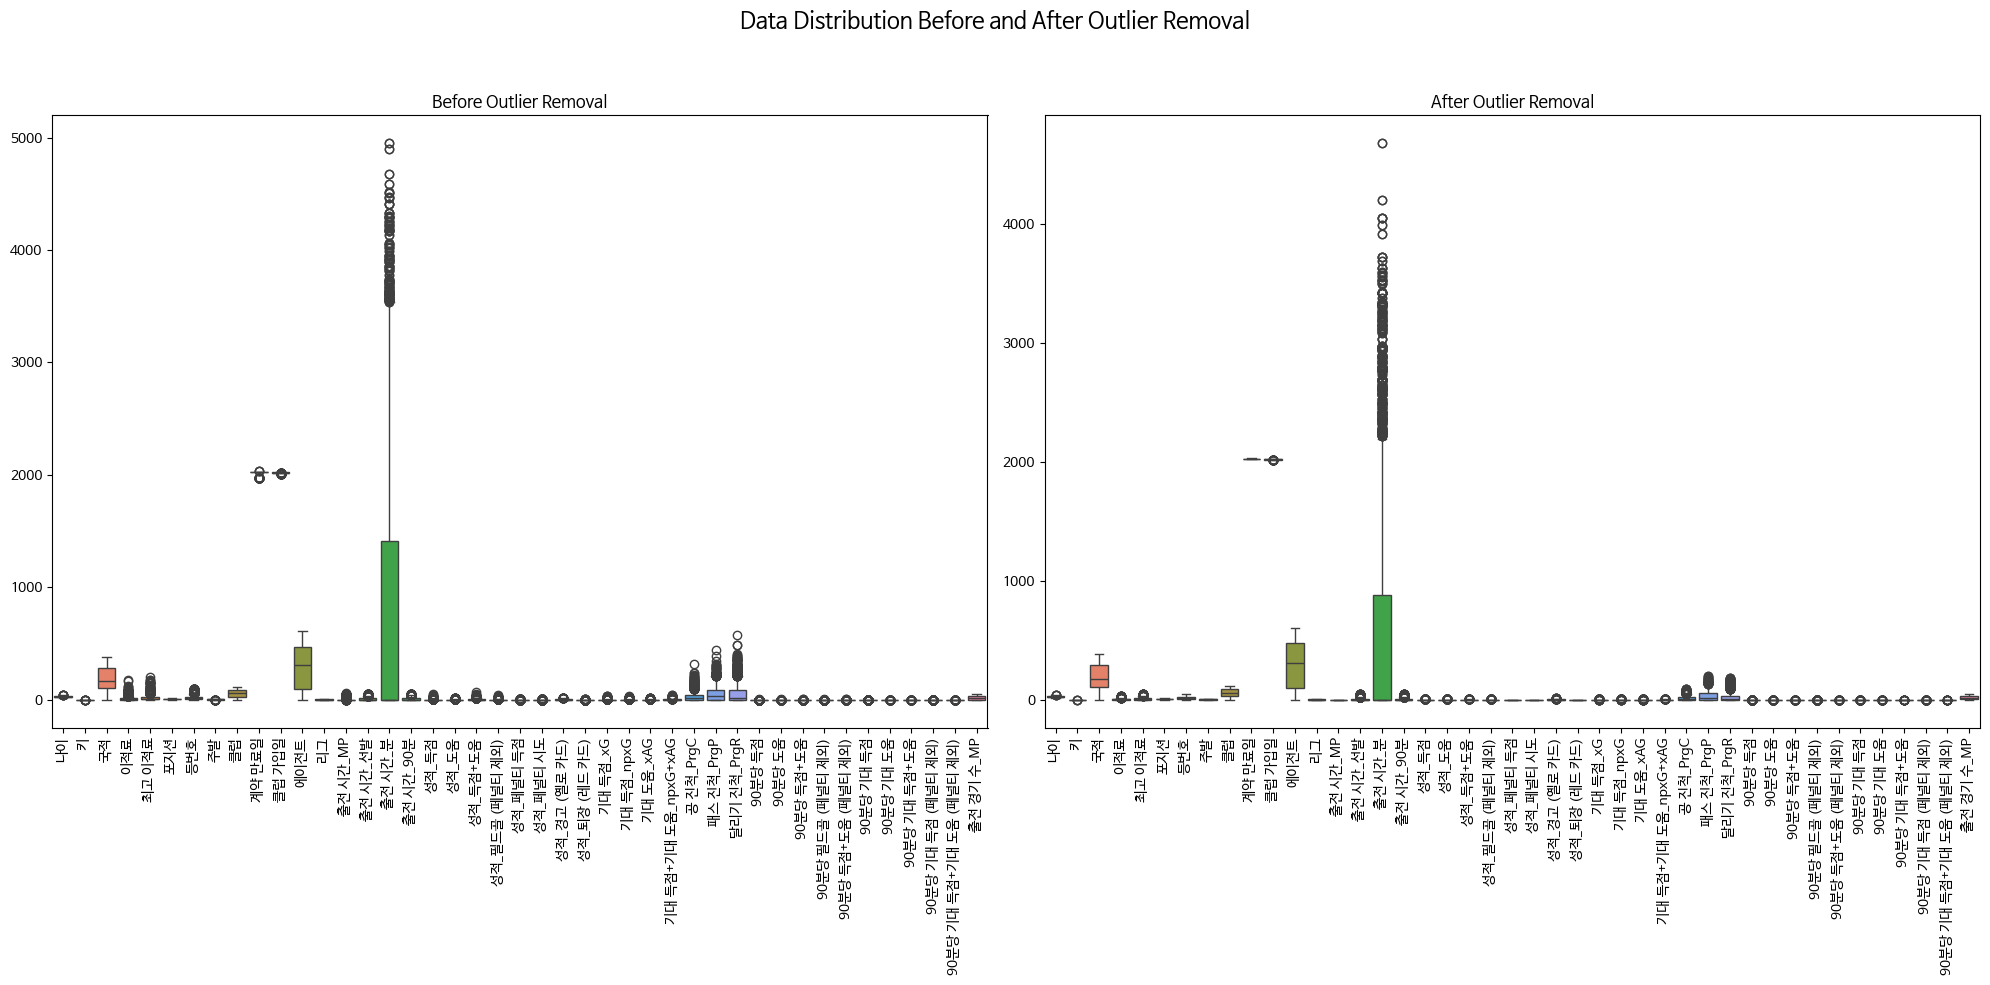

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이상치 제거 전의 데이터 분포
plt.figure(figsize=(20, 10))
plt.suptitle('Data Distribution Before and After Outlier Removal', fontsize=16)

# Boxplot for each numeric column before outlier removal
plt.subplot(1, 2, 1)
sns.boxplot(data=numeric_df)
plt.title('Before Outlier Removal')
plt.xticks(rotation=90)

# IQR을 이용한 이상치 처리
Q1 = numeric_df.quantile(0.25)  # 25번째 백분위수 (하위 사분위수)
Q3 = numeric_df.quantile(0.75)  # 75번째 백분위수 (상위 사분위수)
IQR = Q3 - Q1  # Interquartile Range (IQR)

# 이상치의 하한 및 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 포함하는 조건
outliers_condition = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 이상치가 있는 행을 필터링하여 확인
print("이상치가 있는 행:")
print(df[outliers_condition.any(axis=1)])

# 이상치를 제거 (선택 사항)
df_cleaned = df[~outliers_condition.any(axis=1)]

# Boxplot for each numeric column after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned.select_dtypes(include=['float64', 'int64']))
plt.title('After Outlier Removal')
plt.xticks(rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#EDA 상관분석
- 피어슨 상관 계수 이용 독립변수와 이적료 간 상관관계 파악

## 피어슨 상관 분석

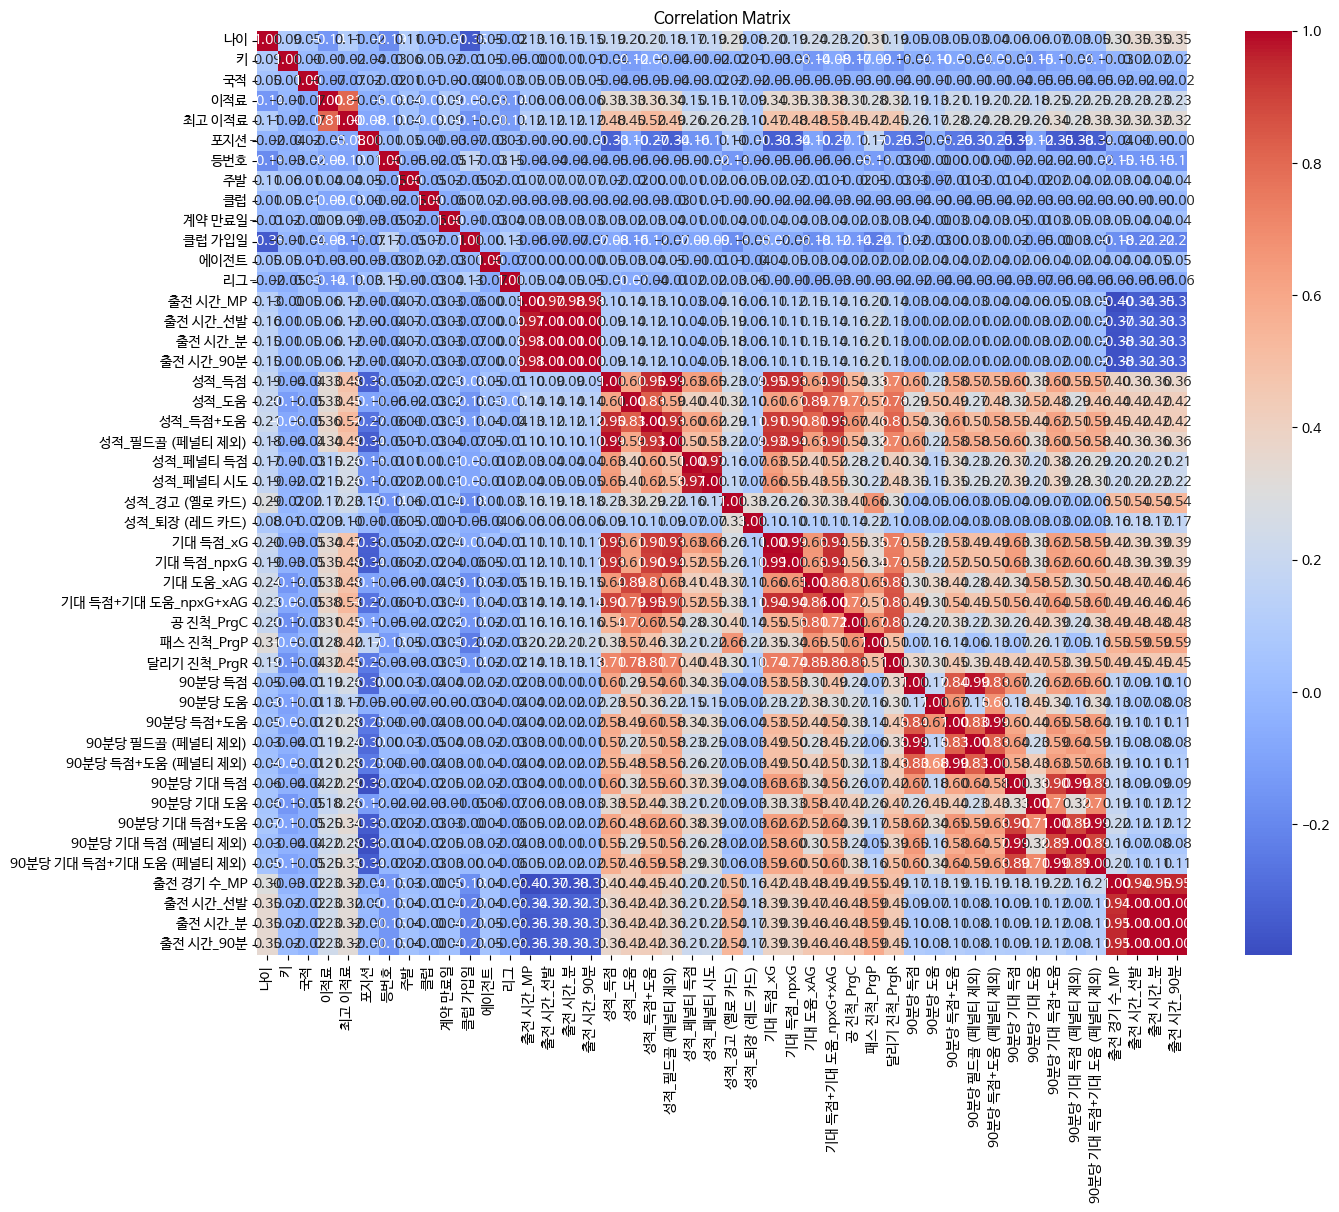

                                 나이         키        국적       이적료    최고 이적료  \
나이                         1.000000  0.092996  0.045445 -0.142824  0.107276   
키                          0.092996  1.000000  0.004748 -0.007252 -0.022637   
국적                         0.045445  0.004748  1.000000 -0.065846 -0.068835   
이적료                       -0.142824 -0.007252 -0.065846  1.000000  0.808954   
최고 이적료                     0.107276 -0.022637 -0.068835  0.808954  1.000000   
포지션                       -0.022295 -0.036776  0.017783 -0.048816 -0.082489   
등번호                       -0.188311 -0.027148 -0.023715 -0.087385 -0.100413   
주발                         0.107834  0.064883  0.012778  0.039908  0.041110   
클럽                         0.006092  0.045617  0.010010 -0.087597 -0.089959   
계약 만료일                    -0.006895  0.023799 -0.002733  0.091247  0.088599   
클럽 가입일                    -0.351907 -0.014718 -0.036376 -0.076391 -0.159531   
에이전트                       0.046963  0.052814  0.008

In [31]:


# 숫자형 데이터만 선택
numeric_df_cleaned = df.select_dtypes(include=['float64', 'int64'])

# 상관 분석
corr = numeric_df_cleaned.corr()

# 상관 행렬 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

print(corr)


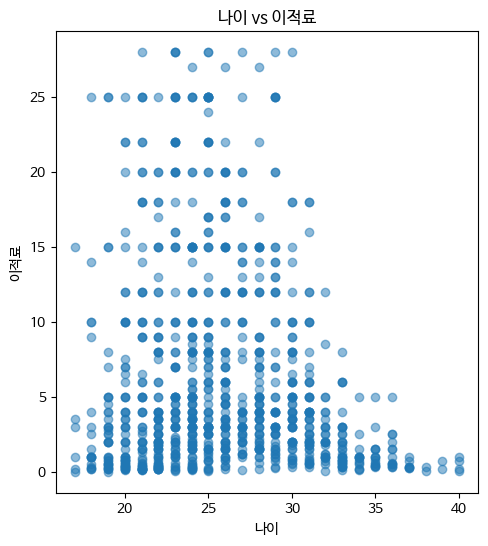

In [32]:


df_cleaneds = df_cleaned[['나이', '키', '이적료']]

# 나이와 이적료 간의 산점도
plt.figure(figsize=(12, 6))

# 나이와 이적료
plt.subplot(1, 2, 1)
plt.scatter(df_cleaneds['나이'], df_cleaneds['이적료'], alpha=0.5)
plt.title('나이 vs 이적료')
plt.xlabel('나이')
plt.ylabel('이적료')

plt.show()


## 결측치 필터링

In [33]:
# NaN 값이 있는 변수들 확인
nan_columns = corr.columns[corr.isna().any()].tolist()
if not nan_columns:
    print("결측치가 없습니다.")
else:
    print("NaN 값이 있는 변수들:", nan_columns)

    # 해당 변수들의 값 분포 확인
    print(df_cleaned[nan_columns].describe())

    # 결측치가 있는 열 제거
    df_cleaned = df_cleaned.dropna(axis=1, how='any')

# 상수 값 (모든 값이 동일한) 열 제거
df_cleaned = df_cleaned.loc[:, df_cleaned.apply(pd.Series.nunique) != 1]


결측치가 없습니다.


# 데이터 모델링

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#pip install statsmodels


희귀분석

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    이적료   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     107.9
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          4.66e-186
Time:                        10:35:07   Log-Likelihood:                -2181.7
No. Observations:                 806   AIC:                             4397.
Df Residuals:                     789   BIC:                             4477.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -937.7449    247.533     -3.788

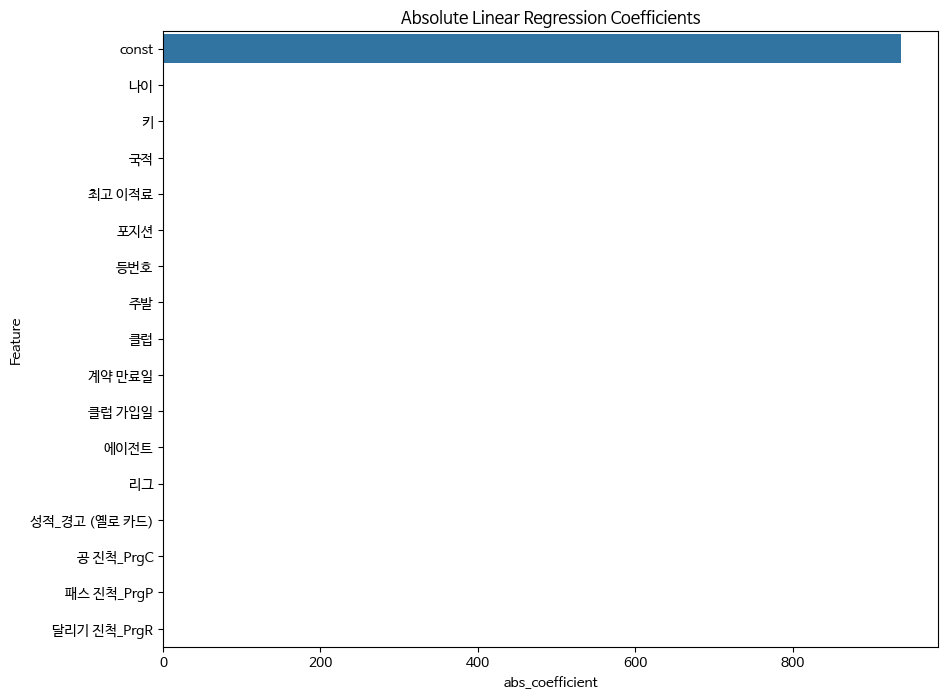

In [43]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# 독립 변수와 종속 변수 설정
X = df_cleaned.drop(columns=['이적료'])
y = df_cleaned['이적료']

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 상수항 추가
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


# 다중 공선성 확인을 위한 VIF 계산
X_vif = sm.add_constant(X_train)  # 상수항 추가
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# VIF 값이 높은 변수를 확인하고 제거
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
if 'const' in high_vif_features:
    high_vif_features.remove('const')

X_train = X_train.drop(columns=high_vif_features)
X_test = X_test.drop(columns=high_vif_features)

# 모델 생성 및 학습
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# 모델 요약 정보 출력
print(model.summary())

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")

# 회귀 계수 출력
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.params})
coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
print(coefficients)

# 회귀 계수를 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='abs_coefficient', y='Feature', data=coefficients)
plt.title('Absolute Linear Regression Coefficients')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


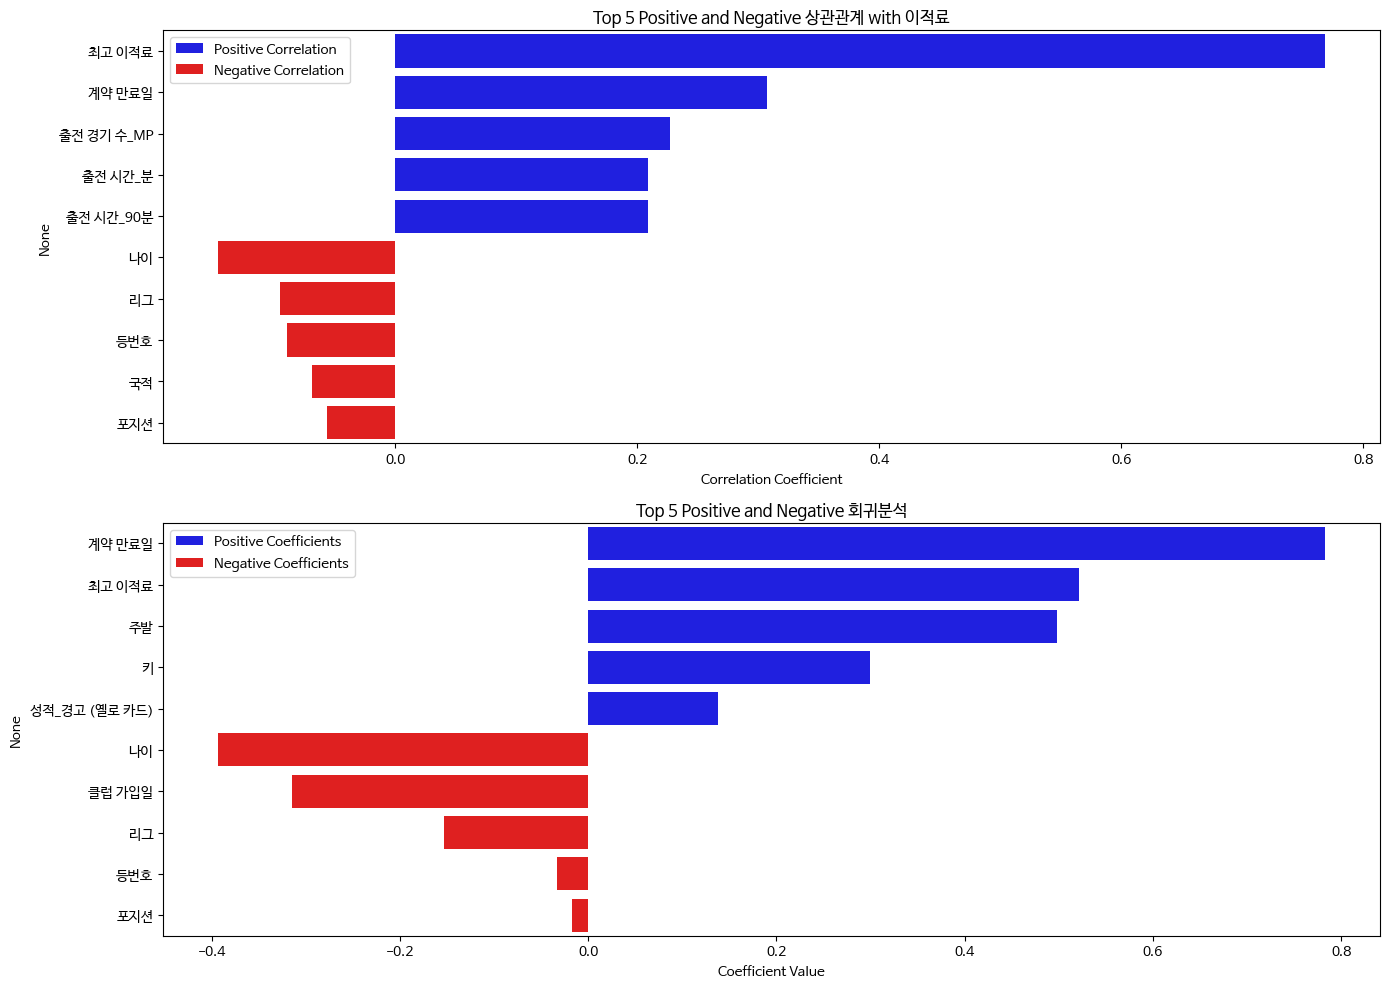

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 독립 변수와 종속 변수 설정
X = df_cleaned.drop(columns=['이적료'])
y = df_cleaned['이적료']

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 공선성 확인을 위한 VIF 계산
X_vif = sm.add_constant(X_train)  # 상수항 추가
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# VIF 값이 높은 변수를 확인하고 제거
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
if 'const' in high_vif_features:
    high_vif_features.remove('const')

X_train = X_train.drop(columns=high_vif_features)
X_test = X_test.drop(columns=high_vif_features)

# 모델 생성 및 학습
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# 상관 분석
corr_matrix = df_cleaned.corr()
corr_with_target = corr_matrix['이적료'].drop('이적료')

# 회귀 분석 결과
coefficients = model.params.drop('const')

# 상위 5개의 양의 상관관계 및 음의 상관관계 변수 선택
top5_pos_corr = corr_with_target.sort_values(ascending=False).head(5)
top5_neg_corr = corr_with_target.sort_values().head(5)
top5_pos_coef = coefficients.sort_values(ascending=False).head(5)
top5_neg_coef = coefficients.sort_values().head(5)

# 상관 분석 시각화
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x=top5_pos_corr.values, y=top5_pos_corr.index, color='blue', label='Positive Correlation')
sns.barplot(x=top5_neg_corr.values, y=top5_neg_corr.index, color='red', label='Negative Correlation')
plt.title('Top 5 Positive and Negative 상관관계 with 이적료')
plt.xlabel('Correlation Coefficient')
plt.legend()

# 회귀 분석 시각화
plt.subplot(2, 1, 2)
sns.barplot(x=top5_pos_coef.values, y=top5_pos_coef.index, color='blue', label='Positive Coefficients')
sns.barplot(x=top5_neg_coef.values, y=top5_neg_coef.index, color='red', label='Negative Coefficients')
plt.title('Top 5 Positive and Negative 회귀분석')
plt.xlabel('Coefficient Value')
plt.legend()

plt.tight_layout()
plt.show()

평균 제곱 오차 (MSE): 17.06209006094088
MSE 값은 모델의 예측 값과 실제 값 사이의 평균 제곱 오차를 나타냅니다. 값이 작을수록 모델의 예측이 실제 값에 가깝다는 것을 의미합니다.

결정 계수 (R²): 0.6288053264078616
R² 값은 모델이 종속 변수의 변동성을 얼마나 설명하는지를 나타냅니다. 0.6288은 약 62.88%의 변동성을 설명할 수 있다는 의미로, 중간 정도의 설명력을 가집니다.

회귀 계수 (Coefficient):
각 독립 변수의 회귀 계수는 해당 변수가 종속 변수에 미치는 영향을 나타냅니다. 양수인 경우 종속 변수에 긍정적인 영향을, 음수인 경우 부정적인 영향을 미칩니다.

나이의 계수는 -0.4960184로, 나이가 많을수록 종속 변수는 감소하는 경향이 있습니다.
키의 계수는 0.2566906으로, 키가 클수록 종속 변수는 증가하는 경향이 있습니다.
최고 이적료의 계수는 0.5463842로, 최고 이적료가 높을수록 종속 변수는 증가하는 경향이 있습니다.

특이한 점:
기대 득점_xG의 계수는 -61.44213, 기대 득점.1_npxG의 계수는 52.28305로, 서로 상반된 영향을 미치는 것으로 보입니다.
90분당 기대 득점의 계수는 536.4857, 90분당 기대 득점 (페널티 제외)의 계수는 -511.8018로, 큰 값의 양과 음의 영향이 나타납니다.

특정 변수 해석:
출전 시간_MP, 출전 시간.1_선발, 출전 시간.2_분, 출전 시간.3_90분 등 출전 시간 관련 변수들이 종속 변수에 미치는 영향은 매우 작거나 무시할 수 있는 수준입니다.
성적_득점, 성적.3_필드골 (페널티 제외)는 종속 변수에 긍정적인 영향을 미치며, 성적.1_도움은 부정적인 영향을 미칩니다.
기대 득점+기대 도움_npxG+xAG는 종속 변수에 긍정적인 영향을 미치는 반면, 기대 도움_xAG는 부정적인 영향을 미칩니다.